In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beyond-analysis/train.csv
/kaggle/input/beyond-analysis/sample_submission_random.csv
/kaggle/input/beyond-analysis/test.csv


In [65]:
import keras
import keras.backend as K
from keras.layers.core import Activation
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing


In [69]:
train_df = pd.read_csv('../input/beyond-analysis/train.csv')

In [70]:
train_df.head(20)


,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
0,98481267304,1,0,M,B,1,0.00000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
1,98481267304,2,0,M,B,1,0.13735,0.011550,0.09990,0.0,...,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863
2,98481267304,3,0,M,B,1,0.15835,0.010425,0.02420,0.0,...,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
3,98481267304,4,0,M,B,1,0.44490,0.035850,0.23980,0.0,...,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863
4,98481267304,5,0,M,B,1,0.00000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
5,98481267304,6,0,M,B,1,0.00000,0.000000,0.00000,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
6,98481267304,7,0,M,B,1,0.04505,0.002950,0.00660,0.0,...,0.0,0.0,1.1,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
7,98481267698,1,1,M,I,1,5.00000,0.750000,0.00000,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,7.182779,115.068493
8,98481267698,2,1,M,I,1,11.25000,1.690000,24.64500,0.0,...,0.0,0.0,0.7,0.5,0.0,0.0,0.0,0.0,7.182779,115.068493
9,98481267698,3,1,M,I,1,47.14050,6.909500,45.69765,0.0,...,0.0,2.0,1.8,0.8,0.0,0.0,0.0,0.0,7.182779,115.068493


In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246837 entries, 0 to 1246836
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UNIQUE_IDENTIFIER         1246837 non-null  int64  
 1   SEQUENCE_NO               1246837 non-null  int64  
 2   STATUS_CHECK              1246837 non-null  int64  
 3   CATEGORY_1                1246837 non-null  object 
 4   CATEGORY_2                1246837 non-null  object 
 5   ACTIVE_YN                 1246837 non-null  int64  
 6   ENTRY                     1246837 non-null  float64
 7   REVENUE                   1246837 non-null  float64
 8   WINNINGS_1                1246837 non-null  float64
 9   WINNINGS_2                1246837 non-null  float64
 10  DISCOUNT                  1246837 non-null  float64
 11  DEPOSIT                   1246837 non-null  float64
 12  DEPOSIT_NUMBER            1246837 non-null  float64
 13  DEPOSIT_2                 1

In [72]:
train_df.describe()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
count,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,...,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06
mean,9.852168e+10,1.105455e+01,4.223696e-01,9.868451e-01,4.726720e+00,5.350111e-01,3.700804e+00,4.262171e-02,4.482682e-01,7.602949e-01,...,1.604540e-03,1.379019e-01,2.268259e+00,7.415130e-01,3.447181e-01,2.749940e-01,3.990834e-02,1.652854e-02,6.508164e+00,2.081873e+02
std,6.339280e+06,7.850787e+00,4.939370e-01,1.139379e-01,2.609701e+01,2.557525e+00,2.222386e+01,8.355851e-01,2.193891e+00,3.407900e+00,...,1.532719e-02,1.171732e+00,4.263824e+00,1.567570e+00,5.121462e+00,4.754888e+00,4.349036e-01,1.926375e-01,1.162251e+01,2.269953e+02
min,9.848127e+10,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.604128e+00,0.000000e+00
25%,9.851986e+10,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.012769e+00,3.835616e+01
50%,9.852279e+10,1.000000e+01,0.000000e+00,1.000000e+00,4.500000e-01,5.970000e-02,1.888000e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,7.000000e-01,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.202048e+00,1.150685e+02
75%,9.852542e+10,1.700000e+01,1.000000e+00,1.000000e+00,1.962600e+00,2.637500e-01,1.276900e+00,0.000000e+00,0.000000e+00,5.000000e-01,...,0.000000e+00,0.000000e+00,2.300000e+00,8.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.042758e+00,3.068493e+02
max,9.852732e+10,3.000000e+01,1.000000e+00,1.000000e+00,2.819799e+03,2.096527e+02,2.086580e+03,3.531417e+02,2.000000e+02,1.250000e+02,...,1.300000e+00,6.450000e+02,1.077000e+02,4.510000e+01,6.140000e+02,6.732000e+02,3.330000e+01,1.870000e+01,8.340632e+02,1.000000e+03


In [73]:
label_encoder = preprocessing.LabelEncoder()
train_df['CATEGORY_1']= label_encoder.fit_transform(train_df['CATEGORY_1'])
train_df['CATEGORY_1'].unique()

array([9, 2, 5, 1, 7, 4, 0, 8, 6, 3])

In [74]:
train_df

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
0,98481267304,1,0,9,B,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
1,98481267304,2,0,9,B,1,0.137350,0.011550,0.09990,0.0,...,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863
2,98481267304,3,0,9,B,1,0.158350,0.010425,0.02420,0.0,...,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
3,98481267304,4,0,9,B,1,0.444900,0.035850,0.23980,0.0,...,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863
4,98481267304,5,0,9,B,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246832,98527316143,30,0,1,D,1,0.100000,0.015000,0.23375,0.0,...,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,4.086504,156.164384
1246833,98527316168,1,0,1,D,1,0.370533,0.048900,0.12320,0.0,...,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0,3.959112,43.835616
1246834,98527316168,2,0,1,D,1,0.371137,0.040704,0.09790,0.0,...,0.0,0.0,2.5,0.2,0.0,0.0,0.0,0.0,3.959112,43.835616
1246835,98527316168,3,0,1,D,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.959112,43.835616


In [77]:
label_encoder = preprocessing.LabelEncoder()
train_df['CATEGORY_2']= label_encoder.fit_transform(train_df['CATEGORY_2'])
train_df['CATEGORY_2'].unique()

array([1, 8, 3, 4, 0, 2, 5, 7, 6])

In [79]:
train_df

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
0,98481267304,1,0,9,1,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
1,98481267304,2,0,9,1,1,0.137350,0.011550,0.09990,0.0,...,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863
2,98481267304,3,0,9,1,1,0.158350,0.010425,0.02420,0.0,...,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
3,98481267304,4,0,9,1,1,0.444900,0.035850,0.23980,0.0,...,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863
4,98481267304,5,0,9,1,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246832,98527316143,30,0,1,3,1,0.100000,0.015000,0.23375,0.0,...,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,4.086504,156.164384
1246833,98527316168,1,0,1,3,1,0.370533,0.048900,0.12320,0.0,...,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0,3.959112,43.835616
1246834,98527316168,2,0,1,3,1,0.371137,0.040704,0.09790,0.0,...,0.0,0.0,2.5,0.2,0.0,0.0,0.0,0.0,3.959112,43.835616
1246835,98527316168,3,0,1,3,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.959112,43.835616


In [80]:
import seaborn as sns

In [82]:
train_df['DEPOSIT_2'].value_counts()

0.000     1150580
0.250       40052
1.000       21840
0.500       20911
2.500        5032
           ...   
1.925           1
2.750           1
24.500          1
1.300           1
0.370           1
Name: DEPOSIT_2, Length: 134, dtype: int64

<AxesSubplot:>

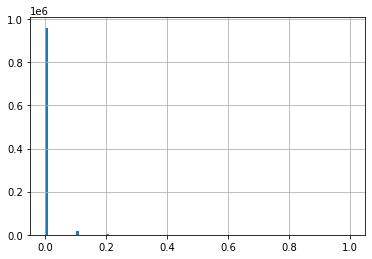

In [57]:
train_df['WITHDRAW_NUMBER'].hist(bins=100)

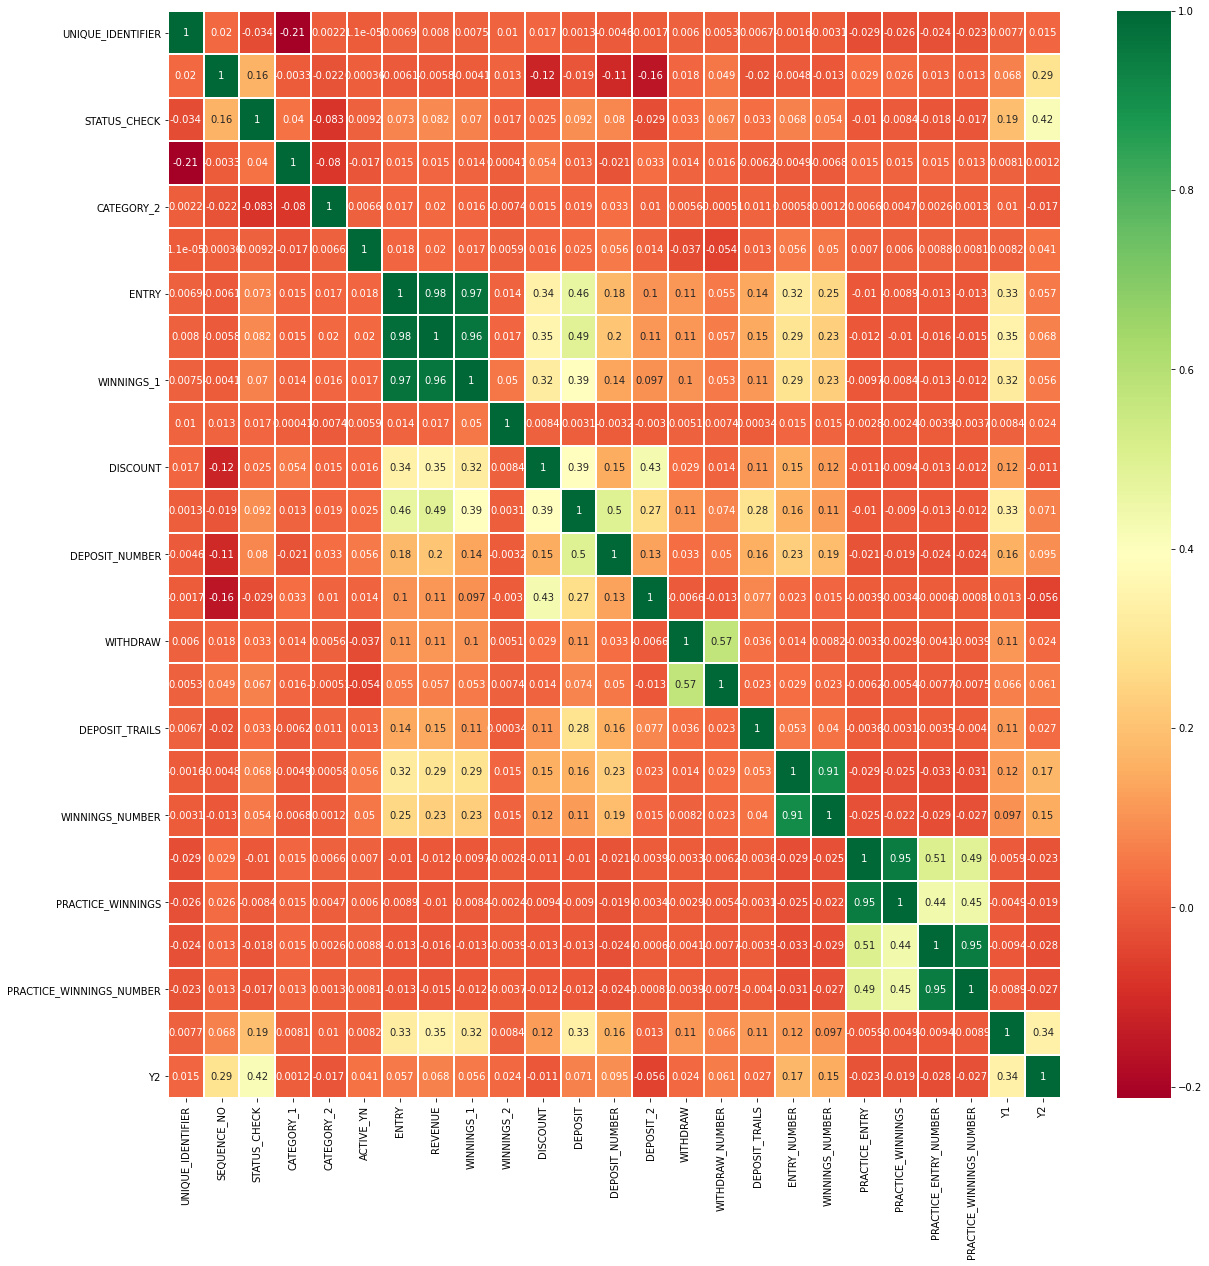

In [83]:
import seaborn as sns
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()